In [1]:
# For Data
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from future import division

In [6]:
import requests
from io import StringIO
import io

In [7]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama"

In [17]:
source = requests.get("http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama").text

In [19]:
poll_data = StringIO(source)

In [24]:
poll_df = pd.read_csv("2012-general-election-romney-vs-obama.csv")

In [25]:
poll_df.info

<bound method DataFrame.info of                                 Pollster  Start Date    End Date  \
0              Politico/GWU/Battleground  2012-11-04  2012-11-05   
1                       YouGov/Economist  2012-11-03  2012-11-05   
2                       Gravis Marketing  2012-11-03  2012-11-05   
3                               IBD/TIPP  2012-11-03  2012-11-05   
4                              Rasmussen  2012-11-03  2012-11-05   
5                   JZ Analytics/Newsmax  2012-11-03  2012-11-05   
6                             UPI/CVOTER  2012-11-03  2012-11-05   
7                    Ipsos/Reuters (Web)  2012-11-01  2012-11-05   
8                                    ARG  2012-11-02  2012-11-04   
9    PPP (D-Americans United for Change)  2012-11-02  2012-11-04   
10                                   CNN  2012-11-02  2012-11-04   
11                              ABC/Post  2012-11-01  2012-11-04   
12                                Gallup  2012-11-01  2012-11-04   
13              

In [26]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [27]:
poll_df.tail()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
581,PPP (D),2009-07-15,2009-07-16,2010-11-08T11:02:37Z,577.0,Registered Voters,Automated Phone,49.0,40.0,11.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
582,PPP (D),2009-06-12,2009-06-16,2010-11-08T10:58:00Z,638.0,Registered Voters,Automated Phone,48.0,40.0,12.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
583,PPP (D),2009-05-14,2009-05-18,2010-11-08T10:49:08Z,1000.0,Registered Voters,Automated Phone,53.0,35.0,12.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
584,PPP (D),2009-04-17,2009-04-19,2010-11-08T10:45:18Z,686.0,Registered Voters,Automated Phone,50.0,39.0,11.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1
585,PPP (D),2009-03-13,2009-03-15,2010-11-08T10:36:31Z,1403.0,Registered Voters,Automated Phone,44.0,44.0,12.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/PPP_Rel...,Pollster,Dem,NaN,1


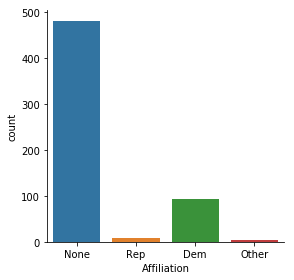

In [28]:
sns.factorplot('Affiliation', data=poll_df, kind="count")

In [ ]:
#Answer: Count of population is being polled. Party affiliations are none, republican, democratic and other.

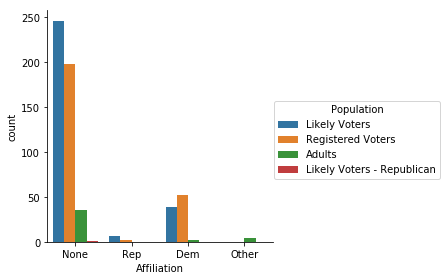

In [29]:
sns.factorplot('Affiliation', data=poll_df, hue='Population', kind="count")

In [34]:
avg = pd.DataFrame(poll_df.mean())
avg.drop("Number of Observations", axis=0, inplace=True)

In [56]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


In [36]:
std = pd.DataFrame(poll_df.std())
std.drop("Number of Observations", axis=0, inplace=True)

In [57]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


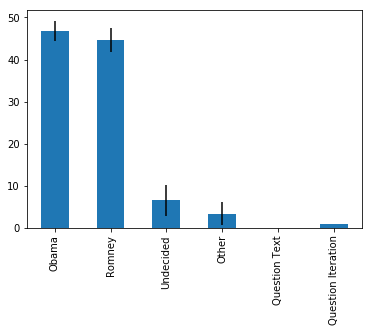

In [37]:
avg.plot(yerr=std, kind='bar', legend=False)
## Results show as Obama

In [38]:
poll_avg = pd.concat([avg, std], axis=1)

In [39]:
poll_avg.columns = ['Average', 'STD']

In [40]:
poll_avg

## Undecided voters affects the poll by 6.55%. 
## And the difference between Obama and Romney's vote is 2%. If we add the undecided voters' % to Romney, Romney 
## could have won or, if we add the votes between Obama and Romney, the poll could show a tie. 

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


/Users/jedvillareal/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


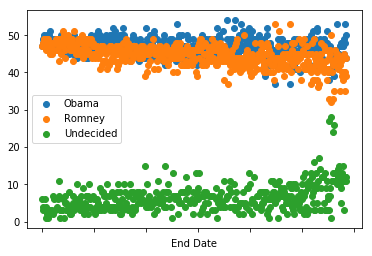

In [41]:
poll_df.plot(x='End Date', y=['Obama', 'Romney', 'Undecided'], marker='o', linestyle='')

In [42]:
from datetime import datetime

In [89]:
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100

In [119]:
pd.pivot_table(poll_df, index =["Undecided"], values=['Number of Observations'])
## we cannot count however, we can get the percentages.

,Number of Observations
Undecided,
1.000000,921.000000
2.000000,1048.324074
2.400000,1989.000000
2.666667,1004.000000
3.000000,1114.592424
3.333333,1381.750000
3.500000,1176.933333
4.000000,1629.632576
4.250000,919.333333


In [103]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


In [45]:
poll_df = poll_df.groupby(['Start Date'], as_index=False).mean()

In [46]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


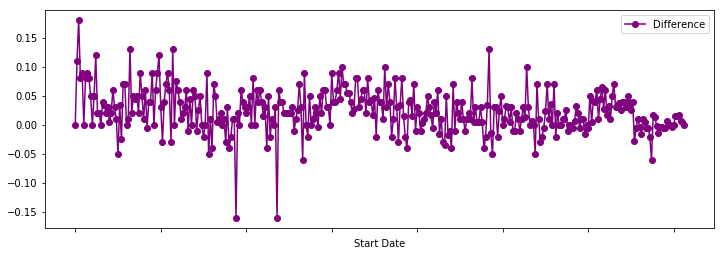

In [123]:
fig = poll_df.plot('Start Date', 'Difference', figsize=(12,4), marker='o', linestyle='-', color='purple')
##Overtime, the difference of votes between Obama and Romney became closer

In [49]:
row_in = 0
xlimit=[]

In [50]:
for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in +=1

print(min(xlimit))
print(max(xlimit))

325
352


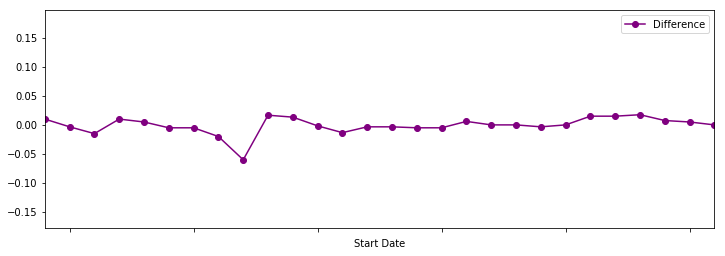

In [52]:
fig=poll_df.plot('Start Date', 'Difference', figsize=(12,4), marker='o', linestyle='-', color='purple', xlim=(329, 356))

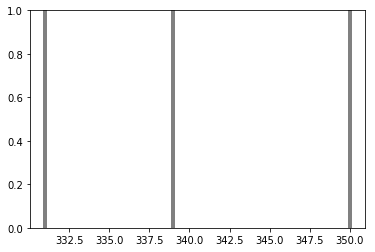

In [53]:
plt.axvline(x=329+2, linewidth=4, color='grey')
plt.axvline(x=329+10, linewidth=4, color='grey')
plt.axvline(x=329+21, linewidth=4, color='grey')

##6. No